# Concrete Dataset

In [1]:
# importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset:
df_concrete = pd.read_csv('Concrete_Data.csv')
print(df_concrete.shape)
df_concrete.head(10)

(1030, 9)


,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:
#checking the datatypes:
df_concrete.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64


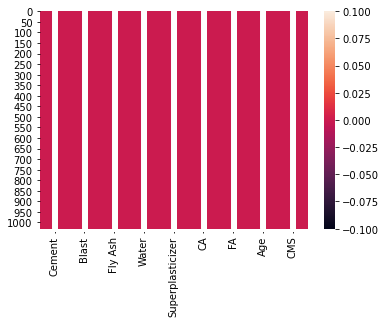

In [4]:
# Checking For null values
print(df_concrete.isnull().sum())
sns.heatmap(df_concrete.isnull(),annot=True)

In [5]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df_concrete.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#Exploratory Data Analysis
#Univarite Analysis
#Multivariate Analysis
#Bivariate Analysis

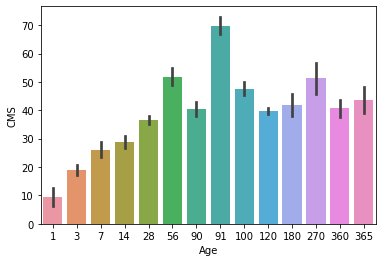

In [7]:
#Checking the relationship between Age and CMS:
sns.barplot(x='Age',y='CMS',data=df_concrete)
plt.show()

In [8]:
df_concrete['Superplasticizer'].value_counts()[0]

379

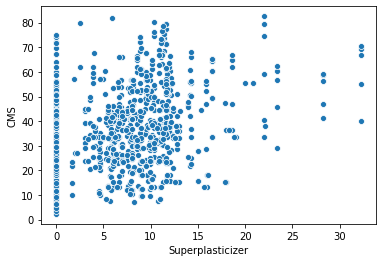

In [9]:
#Checking the relationship between Superplasticizer and CMS:
sns.scatterplot(x='Superplasticizer',y='CMS',data=df_concrete)
plt.show()

In [10]:
#Checking the coerelation:
#how the different features are corelated to each other 
#Their strength of relationship
#Their influence on target variable

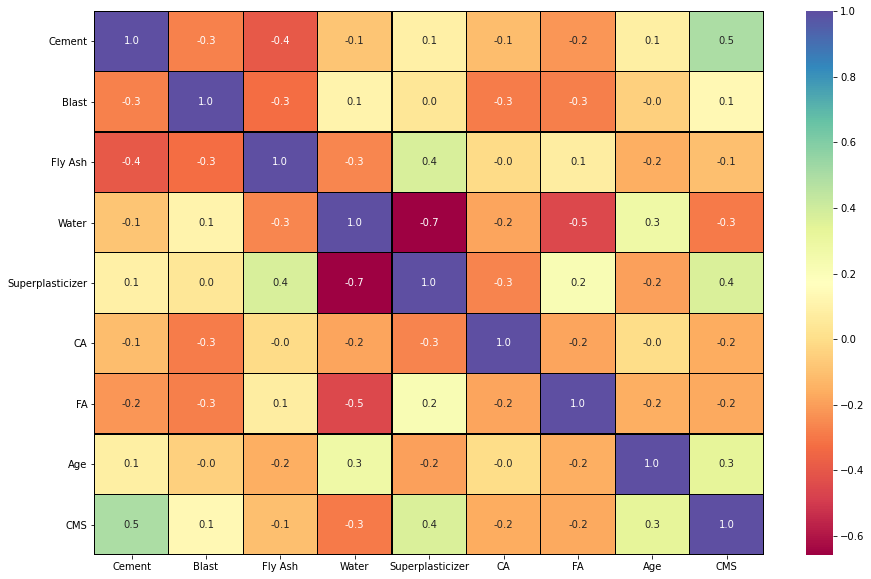

In [11]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_concrete.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [12]:
#Checking for skewness:
#whether the features are right or left skewed
#for right and left skewed we can use logarthim transformation
#if the skewness value is greater than o.55 then the features are skewed

In [13]:
df_concrete.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

In [14]:
import scipy.stats as stat
import pylab

In [15]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not graphically.
def plot_data(df_concrete,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df_concrete[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df_concrete[feature],dist='norm',plot=pylab)
    plt.show()

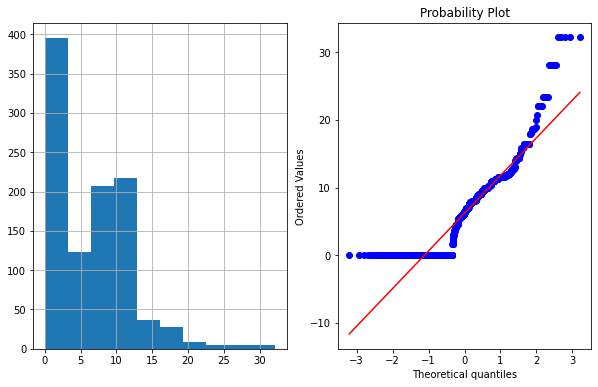

In [16]:
plot_data(df_concrete,'Superplasticizer')

In [17]:
# we can clearly see the data are right Skewed hence we have to normalize it.

In [18]:
for col in df_concrete.columns:
    if df_concrete.skew().loc[col]>0.55:
        df_concrete[col] = np.log1p(df_concrete[col])

In [19]:
df_concrete.skew()

Cement              0.509481
Blast              -0.032700
Fly Ash             0.537354
Water               0.074628
Superplasticizer   -0.324821
CA                 -0.040220
FA                 -0.253010
Age                -0.005085
CMS                 0.416977
dtype: float64

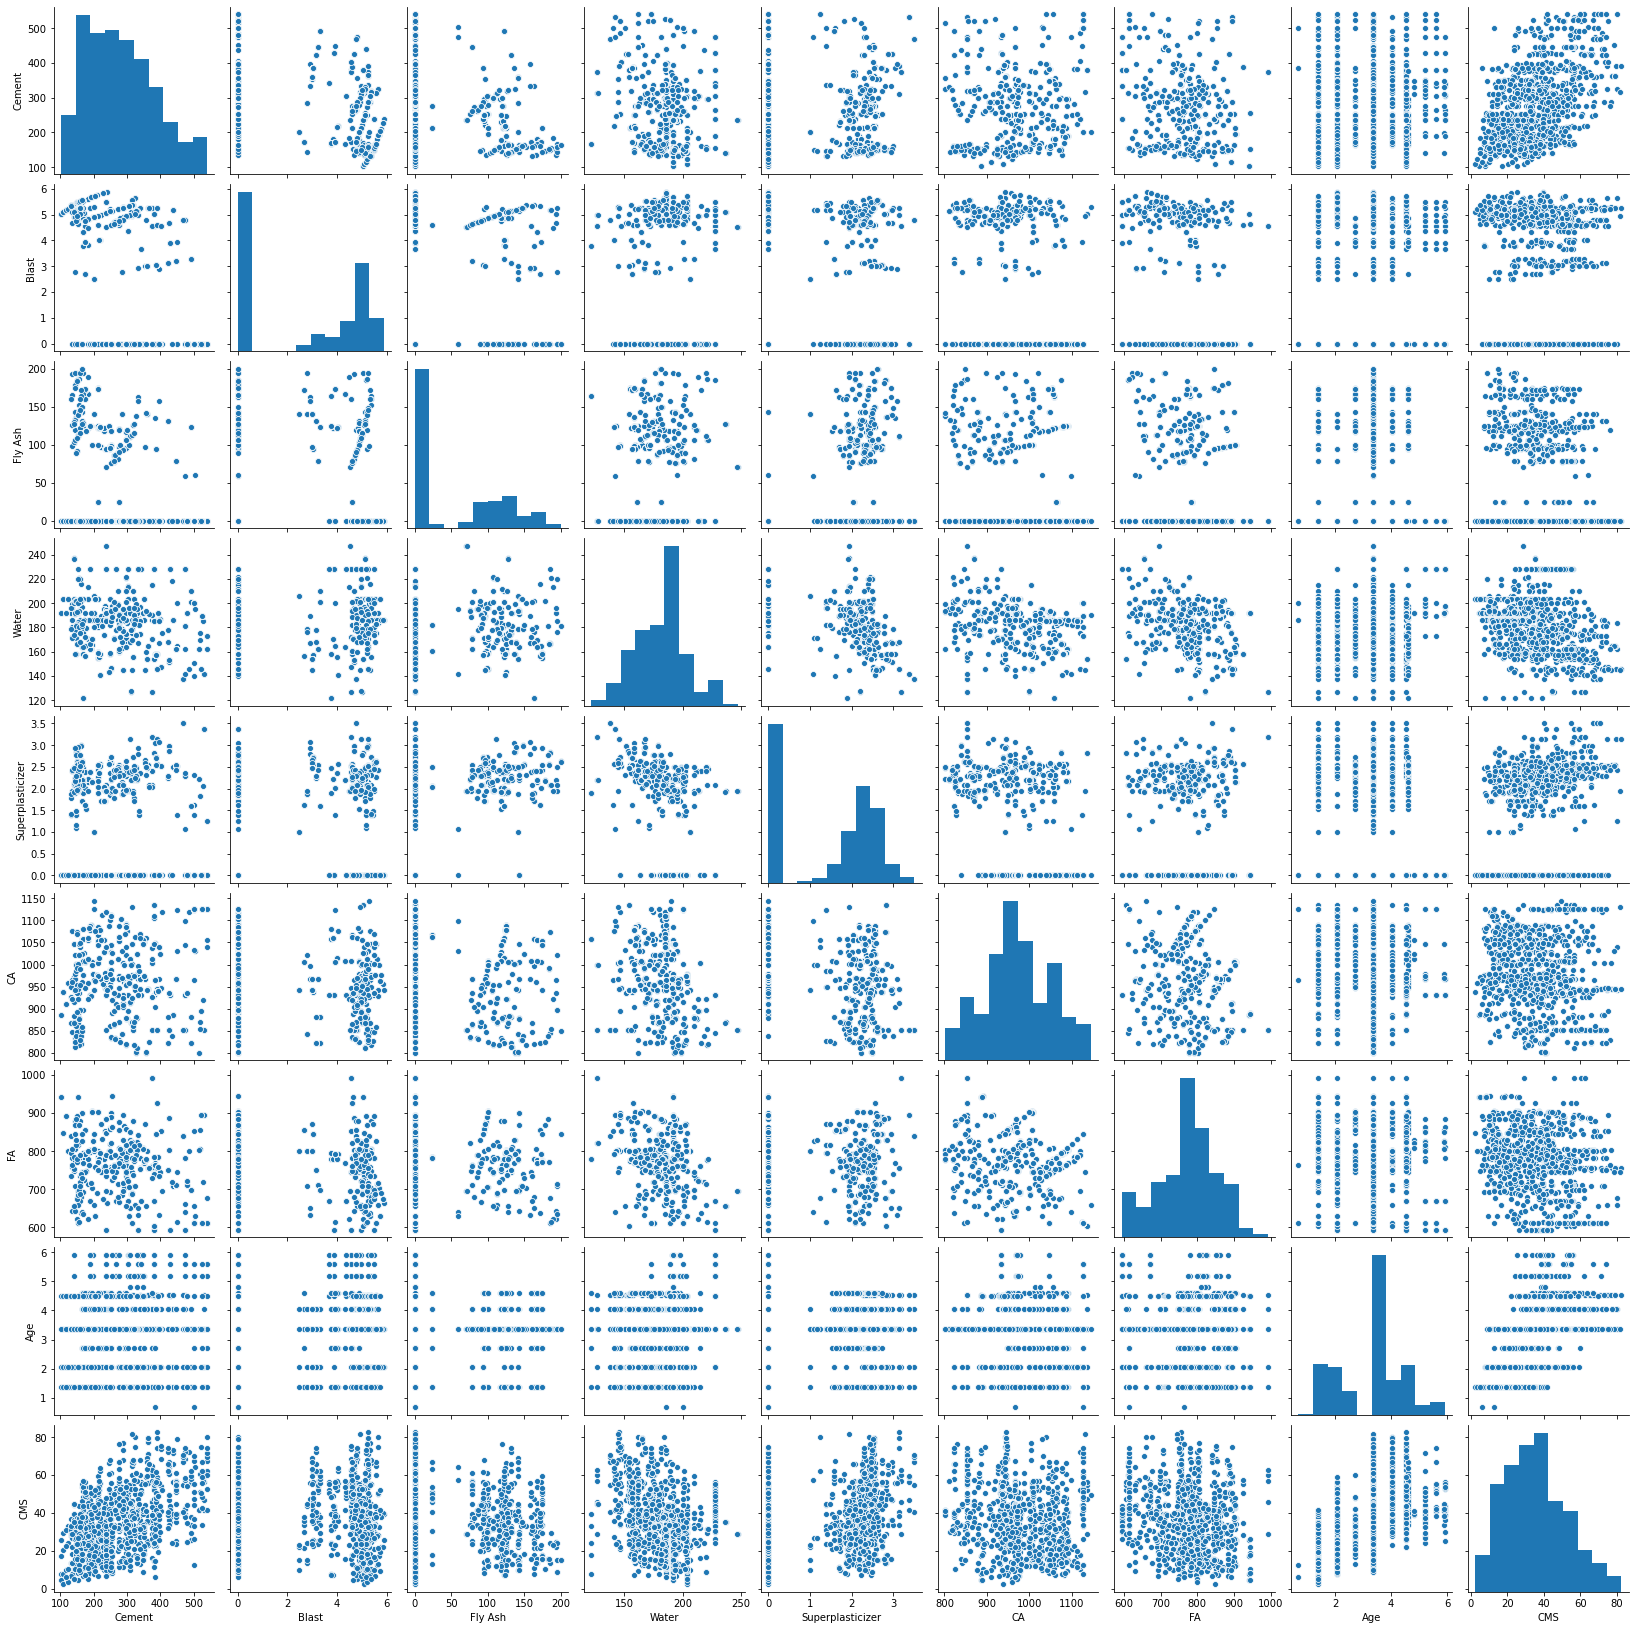

In [20]:
# using pairplot to check relationship between various features all together:
sns.pairplot(df_concrete)
plt.show()

In [22]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [23]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df_concrete))
print(df_concrete.shape)
df_concrete_final = df_concrete.loc[(zscore<3).all(axis=1)]
print(df_concrete_final.shape)

(1030, 9)
(1028, 9)


In [24]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_concrete_final.drop(columns = ['CMS'])
y = df_concrete_final[['CMS']]

In [25]:
#Lets check the shape of input and output values:
print(X.shape)
print(y.shape)

(1028, 8)
(1028, 1)


In [28]:
#Using StandardScaler to Preprocess the data:
# StandardScaler is used to bring the datapoints to standard normal distribution:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_state)
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42 is  0.8157334390718877
r2_score corresponding to random state:  43 is  0.7799561816555318
r2_score corresponding to random state:  44 is  0.7956835400106809
r2_score corresponding to random state:  45 is  0.8045223943238069
r2_score corresponding to random state:  46 is  0.7925777179367486
r2_score corresponding to random state:  47 is  0.7932573063239552
r2_score corresponding to random state:  48 is  0.8226383192933097
r2_score corresponding to random state:  49 is  0.8257899315169119
r2_score corresponding to random state:  50 is  0.7764407729817845
r2_score corresponding to random state:  51 is  0.8159465669616908
r2_score corresponding to random state:  52 is  0.7748366186178586
r2_score corresponding to random state:  53 is  0.8178394566067204
r2_score corresponding to random state:  54 is  0.79799357917476
r2_score corresponding to random state:  55 is  0.8168961478936354
r2_score corresponding to random state:  56 is  0.83081154989025

In [30]:
#Lets do cross Validation and check the mean score.
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring="r2").mean()

0.6734777950226595

In [31]:
#Lets select the random state from above analysis:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [32]:
print('r2 score is ',r2_score(y_test,y_pred))
print('MSME Score is ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.8308115498902517
MSME Score is  7.061424236741104


In [33]:
#Lets save the Model for future analysis:
import joblib
joblib.dump(lr,'lr.obj')
lr_from_joblib = joblib.load('lr.obj')
lr_from_joblib.predict(X_test)

array([[30.39350128],
       [23.07887927],
       [48.73878374],
       [36.89975511],
       [ 0.10265707],
       [29.29283877],
       [27.34240781],
       [27.35035145],
       [50.70156677],
       [41.83628379],
       [33.16247894],
       [45.32880709],
       [14.10252597],
       [26.93928795],
       [37.68478608],
       [24.4298456 ],
       [59.50313355],
       [11.40954976],
       [30.93435237],
       [67.4046738 ],
       [29.11863411],
       [29.69285728],
       [12.30496456],
       [31.25369778],
       [32.94966012],
       [42.33970425],
       [33.28922902],
       [41.01194593],
       [55.1041613 ],
       [21.08315117],
       [70.43873864],
       [29.59010838],
       [48.21770999],
       [50.95492941],
       [47.6367697 ],
       [32.23799032],
       [43.28718816],
       [45.35040586],
       [65.89077986],
       [18.9070989 ],
       [31.6556447 ],
       [46.22359258],
       [37.0673123 ],
       [58.13146547],
       [57.33642585],
       [12